# Cookbook 2 - Computing the spectra for a lightcone

Here we provide a recipe, detailing the functionality available in our set of packages, to compute the power spectra for a lightcone from [ExSHalos](https://arxiv.org/abs/1906.06630)

### 0) Including the libraries

In [1]:
from catalog_specs import cat_specs #to set the catalog specifications
from cosmo import cosmo #to set the cosmology
from code_options import code_parameters #to set the cosmological parameters
from converting_cats_in_cats_of_bins import * #To convert any halo catalog according to bins of mass
from colossus.cosmology import cosmology #To compute bias
from colossus.lss import bias #To compute bias
from create_grids_from_xyz_cats_beta import * #to build the cats
from MTPK_estimate_beta import * #to estimate the spectra
import numpy as np
import matplotlib.pyplot as plt

### 1) Instantiating the parameters

The fiducial **specifications** about the **catalogs** are given by:

In [2]:
cat_specs = cat_specs(nhalos = 1, n_maps = 1, x_cat_min = -135.61,
                           y_cat_min = -137.92, z_cat_min = -136.46, 
                           x_cat_max = 814.62, y_cat_max = 817.44,
                           z_cat_max = 814.17, m_min = 12., 
                           m_max = 14.3)
cat_specs.parameters_print()

nhalos = 1
n_maps = 1
col_m = 6
col_x = 0
col_y = 1
col_z = 2
x_cat_min = -135.61
y_cat_min = -137.92
z_cat_min = -136.46
x_cat_max = 814.62
y_cat_max = 817.44
z_cat_max = 814.17
m_min = 12.0
m_max = 14.3


The cosmology is given by:

In [3]:
mg_phe = cosmo().f_phenomenological()
my_cosmology = cosmo(matgrow = mg_phe, zcentral = 0.15)
my_cosmology.parameters_print()

h = 0.678
Omega0_b = 0.048206
Omega0_cdm = 0.2589
Omega0_k = 0.0
Omega0_DE = 0.692894
A_s = 2.1867466842075255e-09
ln10e10AsA = 3.085
n_s = 0.96
w0 = -1.0
w1 = 0.0
z_re = 9.99999
flat = True
gamma = 0.5454
matgrow = 0.5252511834620611
zcentral = 0.15
c_light = 299792.458


### 2) Setting `MTPK code` options

In [4]:
#Defining the code options
my_code_options = code_parameters(method = 'both',
                                  cell_size = 8.0,
                                  mas_method = 'CIC',
                                  multipoles_order = 4,
                                  do_cross_spectra = False, 
                                  nhalos = 1,
                                  mass_fun = np.array(0.01),
                                  halo_bias = np.array(1.0),
                                  n_x = 120, n_y = 120, n_z = 120,
                                  n_x_orig = - 16.95, 
                                  n_y_orig = - 17.24,
                                  n_z_orig = - 17.03,
                                  verbose = True, 
                                  batch_size = 100000, 
                                  kmin_bias = 0.05, kmax_bias = 0.15,
                                  kph_central = 0.1, dkph_bin = 0.005, 
                                  use_kmin_phys = True, kmin_phys = 0.005,
                                  use_kmax_phys = True, kmax_phys = 0.08)
my_code_options.parameters_print()

verbose = True
method = both
mas_method = CIC
nhalos = 1
use_kdip_phys = False
kdip_phys = 0.005
multipoles_order = 4
do_cross_spectra = False
use_padding = False
padding_length = [10, 10, 10]
use_theory_spectrum = False
theory_spectrum_file = theory_spectrum_file.txt
use_mask = False
mask_filename = mask.hdf5
mass_fun = 0.01
halo_bias = 1.0
cell_size = 8.0
n_x = 120
n_y = 120
n_z = 120
n_x_orig = -16.95
n_y_orig = -17.24
n_z_orig = -17.03
sel_fun_data = False
sel_fun_file = sel_fun-N128_halos.hdf5
kmin_bias = 0.05
kmax_bias = 0.15
kph_central = 0.1
dkph_bin = 0.005
use_kmin_phys = True
kmin_phys = 0.005
use_kmax_phys = True
kmax_phys = 0.08
whichspec = 1
use_cell_low_count_thresh = False
cell_low_count_thresh = 0.0
mult_sel_fun = 1.0
shift_sel_fun = 0.0
k_min_CAMB = 0.0001
k_max_CAMB = 1.0
use_redshifts = False
mask_redshift = False
save_mask = False
save_mean_sel_fun = False
split_tracers = False
tracer_bins = [3.16e+11 1.00e+12 3.16e+12 1.00e+13]
mask_spillover_cells = False
batch_s

### 3) Creating the catalogs

You can create the cats using `create_grids_from_xyz_cats_beta`

In [5]:
#User definitions about where to do each thing
input_filename = 'lightcone'
filenames_catalogs = 'data/lightcone/new_Lightcone_xyz.dat'
dir_out = "maps/sims/lightcone/"

In [6]:
create_grids_from_xyz_cats(cat_specs, my_cosmology, my_code_options, 
                           input_filename, filenames_catalogs, dir_out)


Will load maps stored in files:
[['data/lightcone/new_Lightcone_xyz.dat']]
Dimensions of the grids: n_x, n_y, n_z = 120 120 120

The actual catalog spans the ranges in x,y,z:
x: -135.61 --> 814.62
y: -137.92 --> 817.44
z: -136.46 --> 814.17


With the padding length, of  0 cells, the box will be filled with:
x: ( 0 * 0 , 120 , 0 *0)
y: ( 0 * 0 , 120 , 0 *0)
z: ( 0 * 0 , 120 , 0 *0)

Check: given the padding, your catalog should end at cartesian positions:
max(x) = 960.0
max(y) = 960.0
max(z) = 960.0

Origin (0,0,0) of box will be considered to be displaced from the observer @Earth
by these numbers of cells in each direction:    (This affects RSDs!)
n_x_orig= -16.95
n_y_orig= -17.24
n_z_orig= -17.03


Mass assignement: Clouds in Cell (CiC)

Processing catalog # 0
Reading catalog for tracer 0
Original catalog has 1914723 objects
Processing batch # 0 of 19
Processing objects # 0 to 100000
Processing batch # 1 of 19
Processing objects # 100000 to 200000
Processing batch # 2 of 19
Processi

### 4) Estimating the spectra

You can estimate the spectra using the function inside `MTPK_estimate_beta` code. The `handle_data` is the same as the `input_file_name`

In [7]:
#Some user options
handle_data = "lightcone"
dir_maps = 'maps/sims/lightcone/'
dir_data = 'maps/data/lightcone/'
dir_specs = 'spectra/lightcone/'

In [8]:
MTPK_estimate(cat_specs, my_cosmology, my_code_options, dir_maps, dir_data, dir_specs, handle_data = handle_data)



This is the Multi-tracer power spectrum estimator

Handle of this run (fiducial spectra, biases, etc.):  lightcone

Beggining CAMB calculations

Computing matter power spectrum for given cosmology...

.
Generating the k-space Grid...
.
Will use the N = 1  simulation-only maps contained in directory maps/sims/lightcone/
.
Geometry: (nx,ny,nz) = (120,120,120),  cell_size=8.0 h^-1 Mpc
Geometry including bounding box: (nx,ny,nz) = (120,120,120)
.
Using power spectrum from CAMB + HaloFit
.
----------------------------------
.
Will estimate modes up to k[h/Mpc] =  0.0800  in bins with Delta_k = 0.0050
.
----------------------------------
.

----------------------------------

Central physical k values where spectra will be estimated: 0.1
Initializing the k-binning matrix...
Done with k-binning matrices. Time cost:  0.12 s
Memory occupied by the binning matrix:  3707
Originally k_bar was defined as: ['0.0700', '0.0828', '0.0955']
The true mean of k for each bin is: ['0.0701', '0.0834', '0.0

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


### 5) Some plots

In [9]:
# Taking data
P0_FKP = np.loadtxt('spectra/lightcone/lightcone_P0_FKP.dat')
P0_MT = np.loadtxt('spectra/lightcone/lightcone_P0_MTOE.dat')

P2_FKP = np.loadtxt('spectra/lightcone/lightcone_P2_FKP.dat')
P2_MT = np.loadtxt('spectra/lightcone/lightcone_P2_MTOE.dat')

P4_FKP = np.loadtxt('spectra/lightcone/lightcone_P4_FKP.dat')
P4_MT = np.loadtxt('spectra/lightcone/lightcone_P4_MTOE.dat')

k = np.loadtxt('spectra/lightcone/lightcone_vec_k.dat')

In [10]:
n_bins = cat_specs.nhalos
n_cats = cat_specs.n_maps
n_k = k.shape[0]

P0_FKP = P0_FKP.reshape(n_bins, n_cats, n_k)
P0_MT = P0_MT.reshape(n_bins, n_cats, n_k)

P2_FKP = P2_FKP.reshape(n_bins, n_cats, n_k)
P2_MT = P2_MT.reshape(n_bins, n_cats, n_k)

P4_FKP = P4_FKP.reshape(n_bins, n_cats, n_k)
P4_MT = P4_MT.reshape(n_bins, n_cats, n_k)

In [11]:
k

array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075])

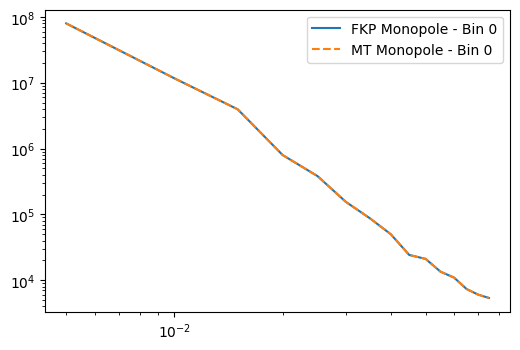

In [12]:
plt.figure(dpi = 100)
for i in range(n_bins):
    plt.loglog(k, np.mean(P0_FKP, axis = 1)[i], label = f'FKP Monopole - Bin {i}')

    plt.loglog(k, np.mean(P0_MT, axis = 1)[i], '--', label = f'MT Monopole - Bin {i}')
    plt.legend()

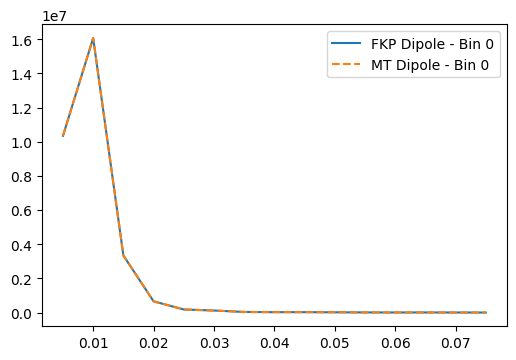

In [13]:
plt.figure(dpi = 100)
for i in range(n_bins):
    plt.plot(k, np.mean(P2_FKP, axis = 1)[i], label = f'FKP Dipole - Bin {i}')

    plt.plot(k, np.mean(P2_MT, axis = 1)[i], '--', label = f'MT Dipole - Bin {i}')
    plt.legend()

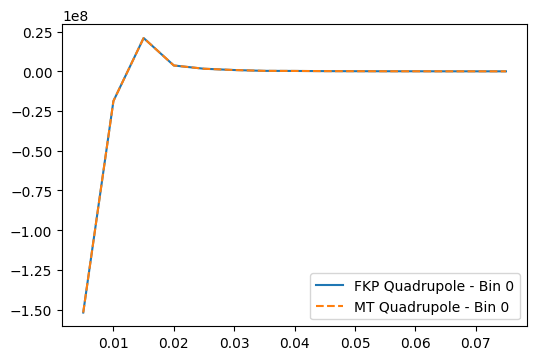

In [14]:
plt.figure(dpi = 100)
for i in range(n_bins):
    plt.plot(k, np.mean(P4_FKP, axis = 1)[i], label = f'FKP Quadrupole - Bin {i}')

    plt.plot(k, np.mean(P4_MT, axis = 1)[i], '--', label = f'MT Quadrupole - Bin {i}')
    plt.legend()